IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DATA LOADING AND PROCESSING

In [2]:
# Load the dataset
sales_data = pd.read_csv('/content/sales_data.csv')

In [3]:
# Convert 'date' to datetime (specifying the format)
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')

# Extract features
sales_data['day_of_week'] = sales_data['date'].dt.dayofweek
sales_data['day'] = sales_data['date'].dt.day
sales_data['month'] = sales_data['date'].dt.month
sales_data['year'] = sales_data['date'].dt.year
sales_data['season'] = np.where(sales_data['month'].isin([11, 12, 1, 2]), 0,
                                 np.where(sales_data['month'].isin([3, 4, 5, 6]), 1,
                                          np.where(sales_data['month'].isin([7, 8, 9, 10]), 2, 3)))

In [4]:
sales_data

,date,sales,holiday,past_sales,previous_year_sales,season,day_of_week,day,month,year
0,2021-01-01,92.72,1,86.44,79.16,0,4,1,1,2021
1,2021-01-02,90.70,0,92.72,87.13,0,5,2,1,2021
2,2021-01-03,91.66,0,90.70,96.00,0,6,3,1,2021
3,2021-01-04,83.07,0,91.66,78.55,0,0,4,1,2021
4,2021-01-05,91.17,0,83.07,78.67,0,1,5,1,2021
...,...,...,...,...,...,...,...,...,...,...
1456,2024-12-27,127.90,0,130.84,123.95,0,4,27,12,2024
1457,2024-12-28,123.73,0,127.90,133.12,0,5,28,12,2024
1458,2024-12-29,132.00,0,123.73,127.04,0,6,29,12,2024
1459,2024-12-30,145.00,0,132.00,117.63,0,0,30,12,2024


from matplotlib import pyplot as plt
sales_data['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['holiday'].plot(kind='hist', bins=20, title='holiday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['past_sales'].plot(kind='hist', bins=20, title='past_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['previous_year_sales'].plot(kind='hist', bins=20, title='previous_year_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='sales', y='holiday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='holiday', y='past_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='past_sales', y='previous_year_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='previous_year_sales', y='season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['holiday']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('holiday')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['past_sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('past_sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['previous_year_sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('previous_year_sales')

from matplotlib import pyplot as plt
sales_data['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['holiday'].plot(kind='line', figsize=(8, 4), title='holiday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['past_sales'].plot(kind='line', figsize=(8, 4), title='past_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['previous_year_sales'].plot(kind='line', figsize=(8, 4), title='previous_year_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

FEATURE SELECTION FOR TRANING PURPOSE

In [5]:
# Feature Selection (excluding 'date' and 'sales' from X)
features =["holiday",	"past_sales", "previous_year_sales", "season",	"day_of_week", "day",	"month", "year"]
X = sales_data[features]
y = sales_data['sales']

TRAIN AND TEST SPLIT OF DATA

In [6]:
# Split data into training (2021-2023) and testing (2024)
train_data = sales_data[sales_data['date'].dt.year < 2024]
test_data = sales_data[sales_data['date'].dt.year == 2024]

X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['sales'], test_data['sales']

# Standardize the features (optional but helps models perform better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TRAINING THE MODEL

In [7]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

EVALUATING THE MODEL

In [9]:
# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # Accuracy as (100 - MAPE)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Mean Absolute Error (MAE): 9.2200
Mean Squared Error (MSE): 134.3288
Root Mean Squared Error (RMSE): 11.5900
R² Score: 0.5633
Accuracy: 93.4849


PLOTTING ACTUAL VS PREDICTED SALES

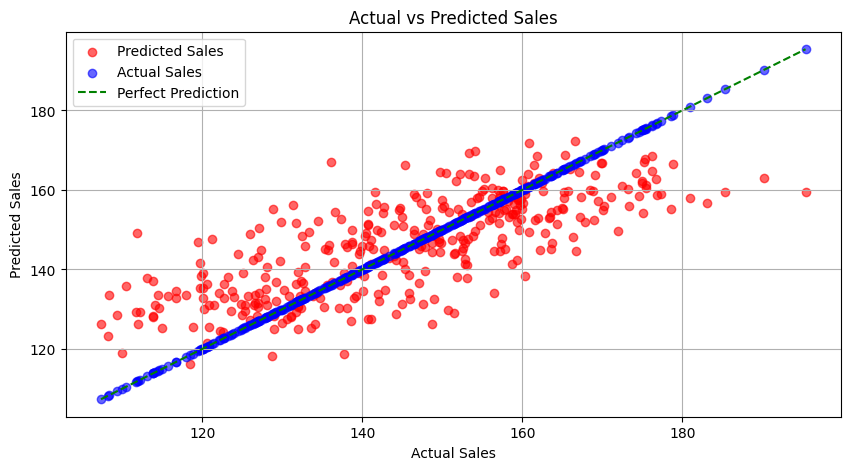

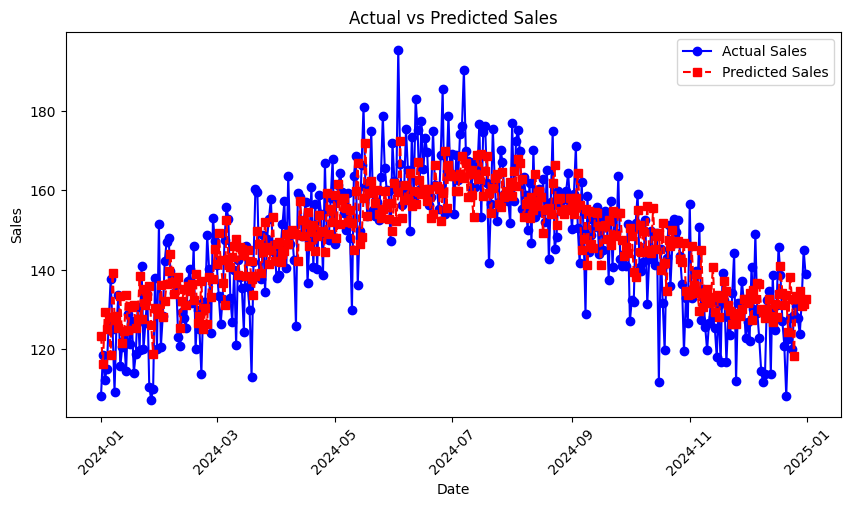

In [10]:
# Plot the predictions vs actual sales
plt.figure(figsize=(10, 5))

# Scatter plot for actual sales
plt.scatter(y_test, y_pred, label='Predicted Sales', color='red', alpha=0.6)
# Scatter plot for actual sales
plt.scatter(y_test, y_test, label='Actual Sales', color='blue', alpha=0.6)
# Add a line where predicted sales equal actual sales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(test_data['date'], y_test, label="Actual Sales", marker='o', color='blue')
plt.plot(test_data['date'], y_pred, label="Predicted Sales", marker='s', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()